In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
weather_data = pd.read_csv(r'D:\RATHNA\FITA ACADEMY\Kaggle\seattle-weather.csv')

In [5]:
weather_data.head()

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
weather_data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [11]:
num_cols = weather_data.select_dtypes(['float64'])
cat_cols = weather_data.select_dtypes(['object'])

In [13]:

# Ensure that the 'precipitation', 'temp_max', 'temp_min', and 'wind' columns are numeric
weather_data['precipitation'] = pd.to_numeric(weather_data['precipitation'], errors='coerce')
weather_data['temp_max'] = pd.to_numeric(weather_data['temp_max'], errors='coerce')
weather_data['temp_min'] = pd.to_numeric(weather_data['temp_min'], errors='coerce')
weather_data['wind'] = pd.to_numeric(weather_data['wind'], errors='coerce')

# **Separating Day, Month and Year**

In [15]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['day'] = weather_data['date'].dt.day
weather_data['month'] = weather_data['date'].dt.month
weather_data['year'] = weather_data['date'].dt.year

In [17]:
weather_data.head()

date  precipitation  temp_max  temp_min  wind  weather  day  month  \
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle    1      1   
1 2012-01-02           10.9      10.6       2.8   4.5     rain    2      1   
2 2012-01-03            0.8      11.7       7.2   2.3     rain    3      1   
3 2012-01-04           20.3      12.2       5.6   4.7     rain    4      1   
4 2012-01-05            1.3       8.9       2.8   6.1     rain    5      1   

   year  
0  2012  
1  2012  
2  2012  
3  2012  
4  2012

# **Distribution of weather types**

C:\Users\User\AppData\Local\Temp\ipykernel_16140\2260209921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=weather_data, x='weather', palette="viridis")


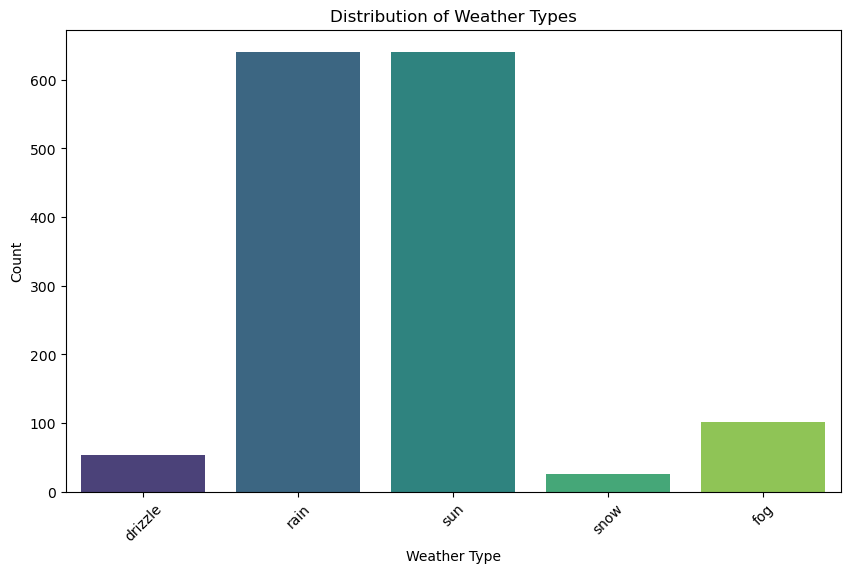

In [23]:

plt.figure(figsize=(10, 6))
sns.countplot(data=weather_data, x='weather', palette="viridis")
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
weather_data["year"].value_counts()

year
2012    366
2013    365
2014    365
2015    365
Name: count, dtype: int64

# **Assessing precipitation by year**

In [72]:
precip_table = weather_data.groupby('year')['wind'].agg(['min', 'max', 'mean']).reset_index()
print(precip_table)

   year  min  max      mean
0  2012  1.0  9.5  3.400820
1  2013  0.4  8.8  3.015890
2  2014  0.6  8.8  3.387671
3  2015  0.5  8.0  3.159726


<Axes: xlabel='year', ylabel='wind'>

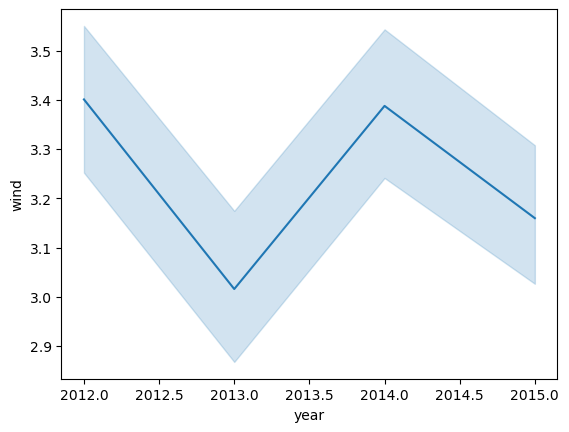

In [74]:
# Wind vs year
sns.lineplot(data = weather_data, x = 'year', y = 'wind')

<Figure size 1200x600 with 0 Axes>

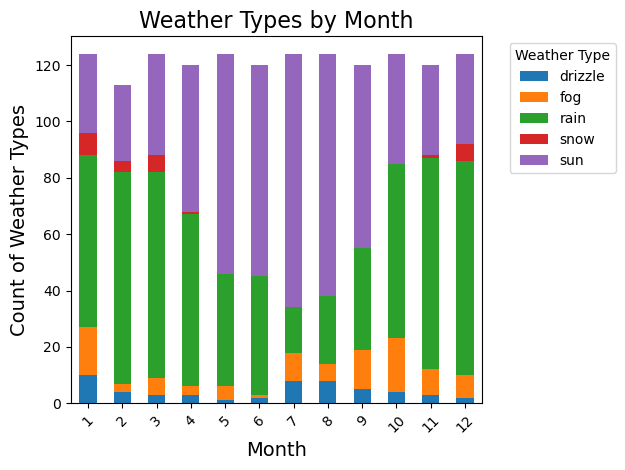

In [32]:
month_weather = weather_data.groupby(['month'])['weather'].value_counts().unstack()

plt.figure(figsize=(12, 6))
month_weather.plot(kind='bar', stacked=True)
plt.title('Weather Types by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Weather Types', fontsize=14)
plt.xticks(rotation=45)  
plt.legend(title='Weather Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

<Figure size 1200x600 with 0 Axes>

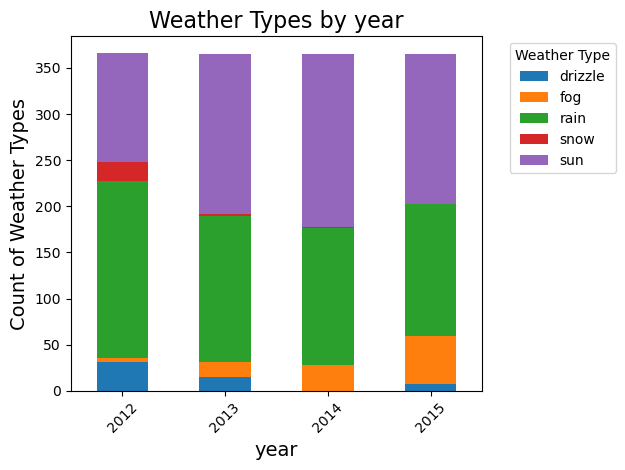

In [34]:
year_weather = weather_data.groupby(['year'])['weather'].value_counts().unstack()
plt.figure(figsize=(12, 6))
year_weather.plot(kind='bar', stacked=True)
plt.title('Weather Types by year', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('Count of Weather Types', fontsize=14)
plt.xticks(rotation=45)  
plt.legend(title='Weather Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

# **Exploratory Data Analysis (EDA)**

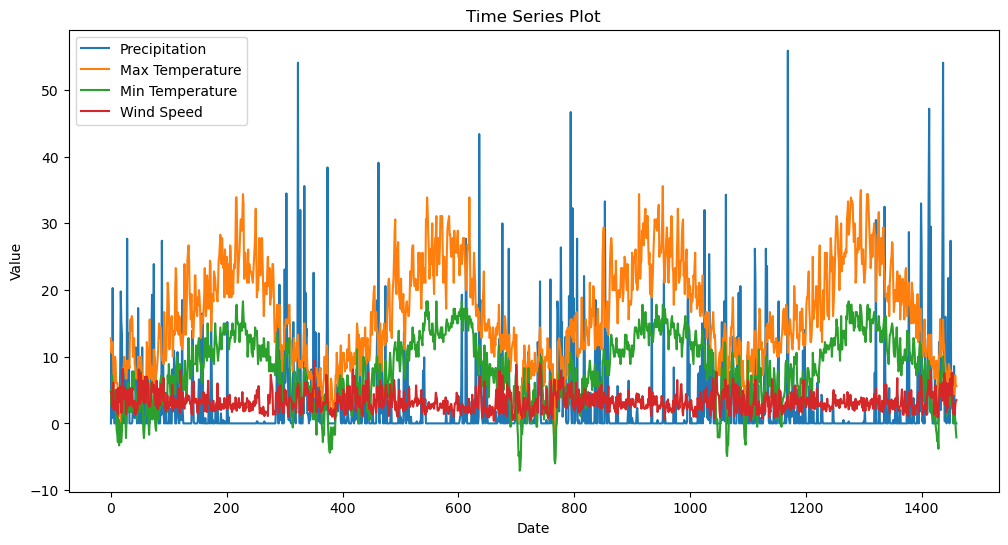

In [36]:

plt.figure(figsize=(12, 6))
plt.plot(weather_data['precipitation'], label='Precipitation')
plt.plot(weather_data['temp_max'], label='Max Temperature')
plt.plot(weather_data['temp_min'], label='Min Temperature')
plt.plot(weather_data['wind'], label='Wind Speed')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [38]:
# Ensure that the 'wind' column is numeric
weather_data['wind'] = pd.to_numeric(weather_data['wind'], errors='coerce')

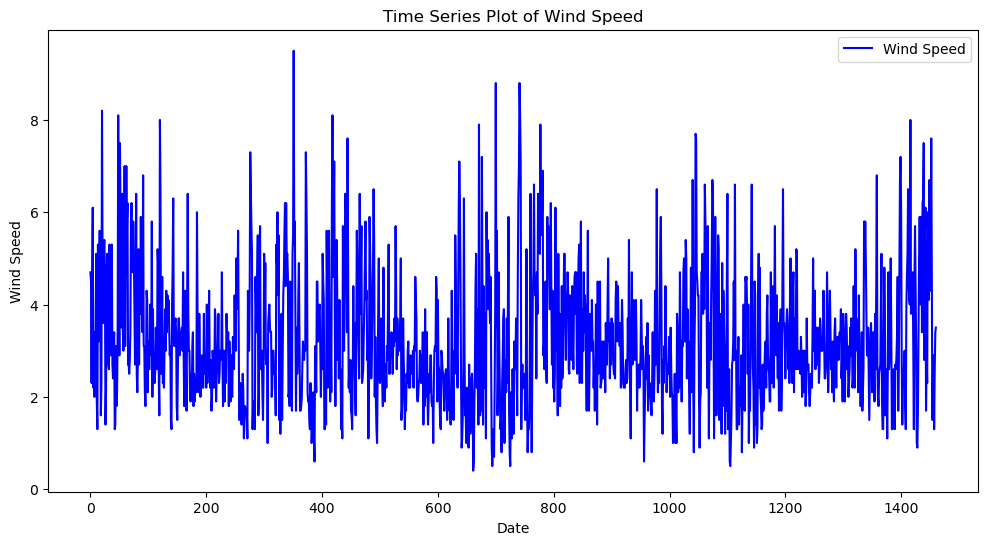

In [40]:
# Exploratory Data Analysis (EDA) for Wind Speed
plt.figure(figsize=(12, 6))
plt.plot(weather_data['wind'], label='Wind Speed', color='blue')
plt.title('Time Series Plot of Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

# **Check for Stationarity for Wind Speed**

In [42]:

result = adfuller(weather_data['wind'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -24.507371901200777
p-value: 0.0
Critical Values: {'1%': -3.434836872962171, '5%': -2.863521656701378, '10%': -2.567825016419591}


# **Decomposition of Wind Speed**

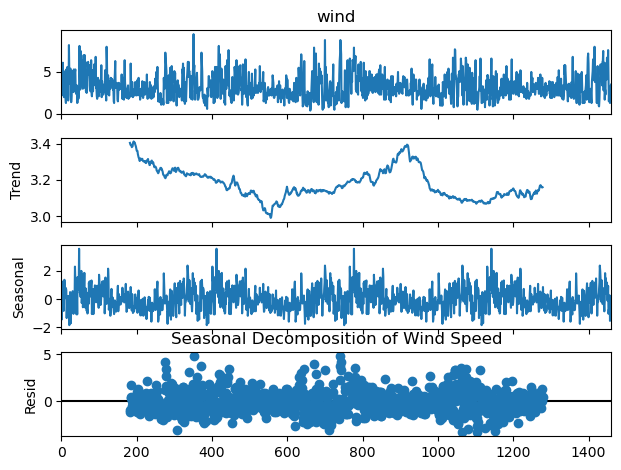

In [44]:

decomposition = seasonal_decompose(weather_data['wind'], model='additive', period=365)
decomposition.plot()
plt.title('Seasonal Decomposition of Wind Speed')
plt.show()

# **Autocorrelation and Partial Autocorrelation Plots**

<Figure size 1200x600 with 0 Axes>

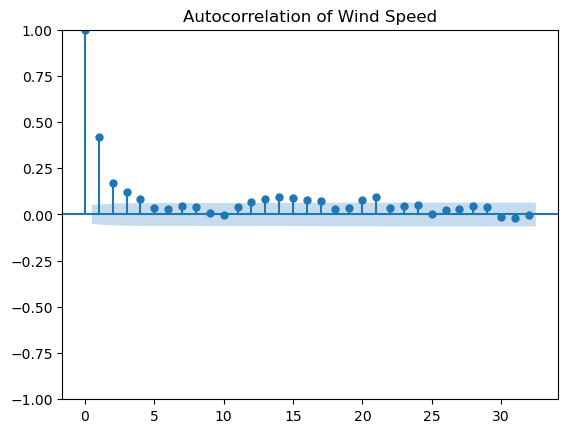

<Figure size 1200x600 with 0 Axes>

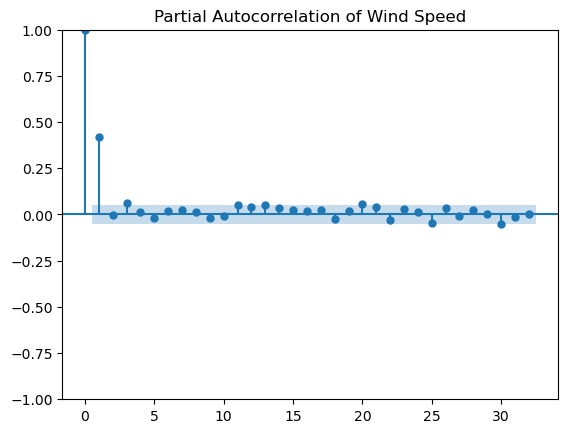

In [46]:

plt.figure(figsize=(12, 6))
plot_acf(weather_data['wind'])
plt.title('Autocorrelation of Wind Speed')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(weather_data['wind'])
plt.title('Partial Autocorrelation of Wind Speed')
plt.show()


# **Model Building and Forecasting for Wind Speed**

In [48]:

model = ARIMA(weather_data['wind'], order=(5, 1, 0))  # Adjust the order as necessary
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   wind   No. Observations:                 1461
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2542.533
Date:                Wed, 20 Nov 2024   AIC                           5097.067
Time:                        13:52:36   BIC                           5128.784
Sample:                             0   HQIC                          5108.898
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4578      0.024    -19.411      0.000      -0.504      -0.412
ar.L2         -0.4169      0.026    -16.148      0.000      -0.467      -0.366
ar.L3         -0.2856      0.027    -10.541      0.0

# **Visualize the forecast**

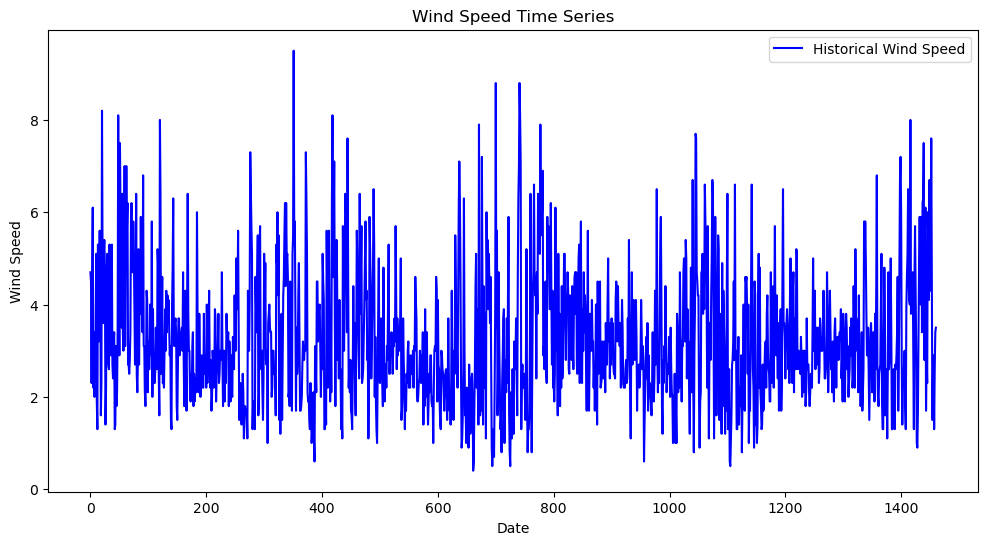

In [50]:

plt.figure(figsize=(12, 6))
plt.plot(weather_data['wind'], label='Historical Wind Speed', color='blue')
plt.title('Wind Speed Time Series')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

# **Prophet Model**

In [52]:
from prophet import Prophet

In [54]:
weather_data.head()

date  precipitation  temp_max  temp_min  wind  weather  day  month  \
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle    1      1   
1 2012-01-02           10.9      10.6       2.8   4.5     rain    2      1   
2 2012-01-03            0.8      11.7       7.2   2.3     rain    3      1   
3 2012-01-04           20.3      12.2       5.6   4.7     rain    4      1   
4 2012-01-05            1.3       8.9       2.8   6.1     rain    5      1   

   year  
0  2012  
1  2012  
2  2012  
3  2012  
4  2012

In [56]:
weather_data_reset = weather_data.reset_index()

# Now you can select and rename the columns as desired
df = weather_data_reset[['date', 'wind']].rename(columns={'date': 'ds', 'wind': 'y'})
print(df.head())

          ds    y
0 2012-01-01  4.7
1 2012-01-02  4.5
2 2012-01-03  2.3
3 2012-01-04  4.7
4 2012-01-05  6.1


In [58]:
m = Prophet()
m.fit(df)

13:53:34 - cmdstanpy - INFO - Chain [1] start processing
13:53:34 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future = m.make_future_dataframe(periods=10)
future.tail()

ds
1466 2016-01-06
1467 2016-01-07
1468 2016-01-08
1469 2016-01-09
1470 2016-01-10

In [62]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1466 2016-01-06  3.073102    1.272701    4.851312
1467 2016-01-07  3.023008    1.151556    4.898103
1468 2016-01-08  3.136527    1.271274    4.874503
1469 2016-01-09  3.329358    1.504353    5.199806
1470 2016-01-10  3.208292    1.511577    5.017274

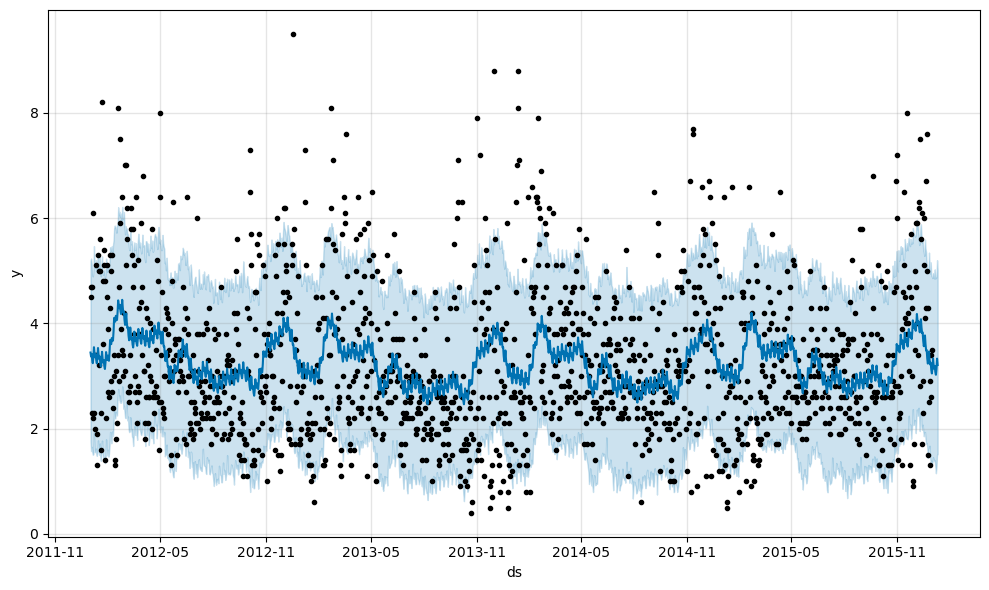

In [64]:
fig1 = m.plot(forecast)

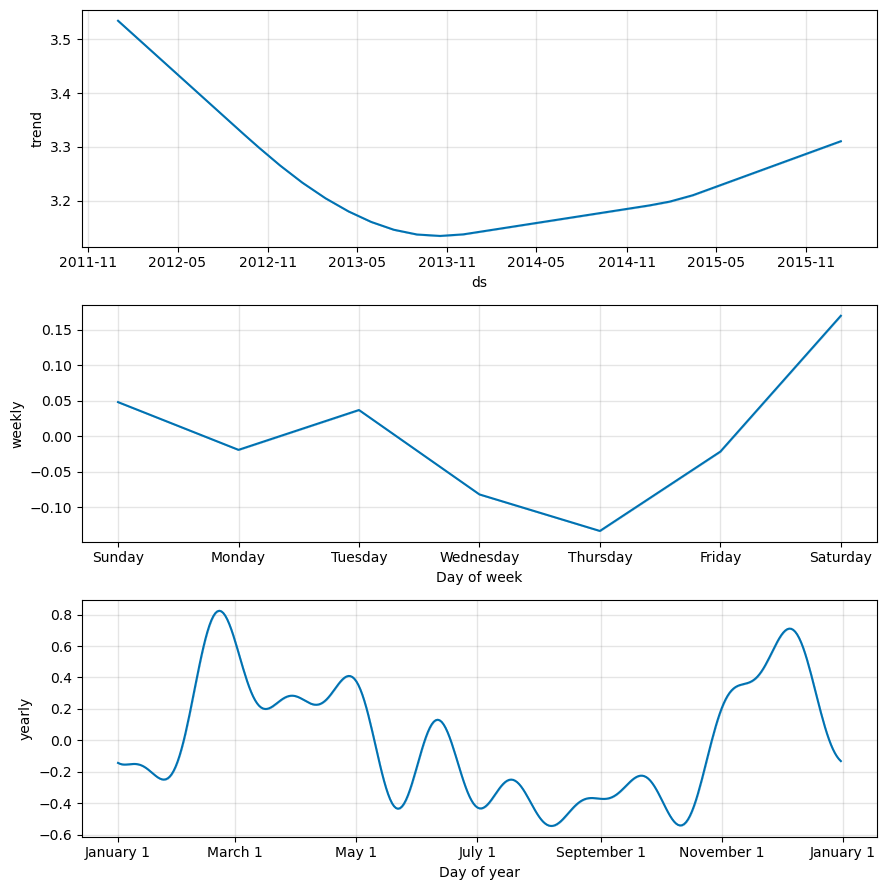

In [66]:
fig2 = m.plot_components(forecast)

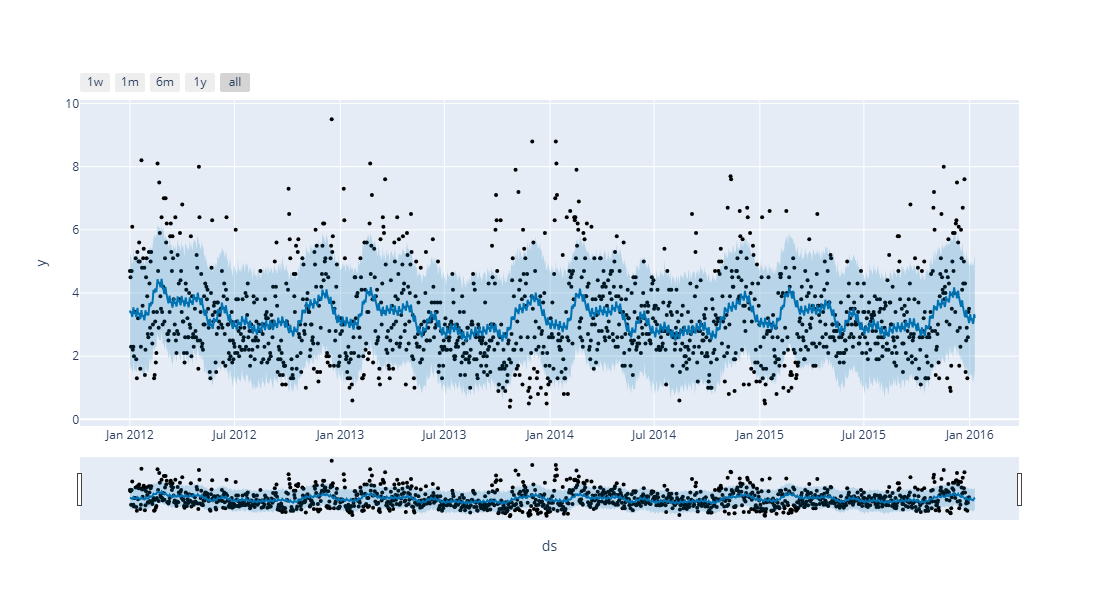

In [68]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)